# Note

## 4.1Numpy-ndarray

### Creating ndarrays

In [1]:
import numpy as np
# 创建ndarray，n-dimension array
arr1 = np.array([[5,6,7,8,9],[5.0,5.1,5.2,5.3,5.3]])
print(arr1)
# array的维度，一个ndarray必有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）
print( "dim is %s, shape is %s, dtype is %s " %(arr1.ndim, arr1.shape, arr1.dtype))
# 当你在本书中看到“数组”、“NumPy数组”、"ndarray"时，基本上都指的是同一样东西，即ndarray对象。

# 其他创建ndarrays方法，np.zeros，np.ones，np.empty(不安全，有时会返回未初始化的垃圾值)
arr_zeros = np.zeros((3,3,2)) # 3,3,2 3个3行2列的array
np.zeros(1, dtype=np.int8)
# 创建Array的方法如下图

[[5.  6.  7.  8.  9. ]
 [5.  5.1 5.2 5.3 5.3]]
dim is 2, shape is (2, 5), dtype is float64 


array([0], dtype=int8)

![](https://i.loli.net/2019/08/06/F5uJa1GP6Ux8C7m.jpg)

![](https://i.loli.net/2019/08/06/Nn18S6v9ZlcEQsa.jpg)

### Data Types for ndarrays

![](https://i.loli.net/2019/08/06/b2K5AulTRWUz3qi.jpg)
![](https://i.loli.net/2019/08/06/mcIDWaHYyKfbSlZ.jpg)

In [2]:
# ndarrays的数据类型
# dtype是NumPy灵活交互其它系统的源泉之一，通常只需要知道你所处理的数据的大致类型是浮点数、复数、整数、布尔值、字符串，还是普通的Python对象即可。当你需要控制数据在内存和磁盘中的存储方式时（尤其是对大数据集），那就得了解如何控制存储类型。
arr_dtype = np.array([1.2,3.5])
print(arr_dtype.dtype, arr_dtype)
arr_dtype_float = arr_dtype.astype(np.uint32) # 笔记：调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同。
print(arr_dtype_float.dtype, arr_dtype_float)
# 可以看到经过类型转换小数部分被截掉

float64 [1.2 3.5]
uint32 [1 3]


### Arithmetic with NumPy Arrays

In [3]:
arr_arithmetic = np.array([[1., 2., 3.], [4., 5., 6.]])
arr_arithmetic2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr_arithmetic * arr_arithmetic) # 支持python方式的四则运算
print(arr_arithmetic>=arr_arithmetic2) # 比大小 不同大小的数组之间的运算叫做广播（broadcasting）

[[ 1.  4.  9.]
 [16. 25. 36.]]
[[ True False  True]
 [False  True False]]


### Basic indexing and slicing

In [4]:
arr = np.arange(10)
print(arr)
print(arr[0:8]) # 切片，前闭后开取值
arr[0:1]=1.5 # 会裁掉小数点
print(arr)
# 当将一个标量赋值给一个切片时，该值会自动传播到整个选区。
# 跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

arr_slice = arr[5:8]
print(arr_slice)
arr_slice[0] = 12345
print(arr)
arr_slice[:] = 0
print(arr)
# 注意：如果你想要得到的是ndarray切I片的一份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7]
[1 1 2 3 4 5 6 7 8 9]
[5 6 7]
[    1     1     2     3     4 12345     6     7     8     9]
[1 1 2 3 4 0 0 0 8 9]


#### Indexing with slices - 切片索引

In [5]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d_sli = arr2d[:2,1:] # 取2行，索引1之后的数据
print(arr2d_sli.shape)
print("注意维度",arr2d[2].shape, arr2d[2,:].shape, arr2d[2:,:].shape) # 不同切法维度不一样

(2, 2)
注意维度 (3,) (3,) (1, 3)


### Boolean Indexing

In [6]:
# 还有这种操作？
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

## 神奇的来了
cond = names == 'Bob' # 根据条件形成布尔索引的ndarray对象
print(cond)
print(data[~cond, 2:])
print("\n")
mask = (names == 'Bob') | (names == 'Will') # 来个稍微复杂的
print(data[mask])

[ True False False  True False False False]
[[-0.51757722 -0.06438459]
 [-1.27754778 -1.30871472]
 [ 0.63166285  0.26476795]
 [ 1.79013498  0.69125493]
 [ 0.45738136 -0.72566569]]


[[ 1.47067148 -0.03871272 -1.147347    1.73072021]
 [-0.87121624 -1.41343857 -1.27754778 -1.30871472]
 [-0.1490908   1.39062903 -1.10313292  0.18843162]
 [ 0.24957427  1.43002792  0.63166285  0.26476795]]


### Fancy Indexing - 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。

In [7]:
arr = np.arange(32).reshape((8, 4))
arr[[-1,5,7,2],[0,3,1,2]] # 利用数组做索引取值
# 无论数组是多少维的，花式索引总是一维的。

array([28, 23, 29, 10])

In [8]:
# 这个是没看懂的部分
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
# 记住，花式索引跟切片不一样，它总是将数据复制到新数组中。

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing Arrays and Swapping Axes

转置是返回的是源数据的视图，不会复制

In [9]:
arr = np.arange(32).reshape(8,4)
arr
arr.T # 求转置矩阵

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [11]:
# arr.swapaxes(1,2) 

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置

In [12]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
arr.transpose((1,0,2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

## 4.2 Universal Functions: Fast Element-Wise Array

In [13]:
arr = np.arange(10)
# 一元通用函数(unary ufunc)
print(np.sqrt(arr))
print(np.exp2(arr))
print("\n")
# 二元通用函数(binary ufunc)
x = np.random.randn(8)
y = np.random.randn(8)
print(x,"\n", y)
print(np.maximum(x, y)) # 求最大元素
print(np.modf(x)) # 求浮点数的ndarray的整数和小数部分

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]


[-0.14817371 -0.50956303  0.7475166   1.49999971 -1.32344345 -0.8124783
 -0.10509214  0.80900062] 
 [ 0.2699062   0.25161121 -0.91657561 -0.86063222 -0.35277221 -0.86755598
 -0.08218792  0.84701054]
[ 0.2699062   0.25161121  0.7475166   1.49999971 -0.35277221 -0.8124783
 -0.08218792  0.84701054]
(array([-0.14817371, -0.50956303,  0.7475166 ,  0.49999971, -0.32344345,
       -0.8124783 , -0.10509214,  0.80900062]), array([-0., -0.,  0.,  1., -1., -0., -0.,  0.]))


![](https://i.loli.net/2019/08/06/mHvg87Izl2KDAFM.jpg)
![](https://i.loli.net/2019/08/06/zG3xu17bIo4jelK.jpg)
![](https://i.loli.net/2019/08/06/FP3LeXN5EySr9ni.jpg)

## 4.3 Array-Oriented Programming with Arrays

用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。

In [14]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("$\sqrt{x^2 + y^2}$")

Text(0.5,1,'$\\sqrt{x^2 + y^2}$')

### 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [15]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [16]:
arr = np.random.randn(2, 2)
np.where(arr > 0, 2, -2)

array([[-2,  2],
       [-2, -2]])

### 数学和统计方法
可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

In [17]:
arr = np.random.randn(5, 4) *10
print(arr)
print(arr.mean())
print(arr.sum())
print(arr.mean(axis=1)) # 某一行上的值
print(arr.mean(axis=0)) # 某一列上的值

[[  5.22599676   0.88020899  -1.50523991  -3.73127174]
 [ 12.16291637  -1.02142385 -20.63359821 -12.63313564]
 [  2.74893516   8.6585726    3.69059894  -1.97535357]
 [ -4.28526017  -1.4475464  -17.65002318 -10.37614657]
 [  1.85702851  14.72819561  -3.74959694  -7.27235127]]
-1.8164247262133917
-36.32849452426783
[ 0.21742352 -5.53131033  3.28068828 -8.43974408  1.39081898]
[ 3.54192332  4.35960139 -7.96957186 -7.19765176]


![](http://upload-images.jianshu.io/upload_images/7178691-a6c6df3ca8e0b98e.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### 用于布尔型数组的方法

In [18]:
arr = np.random.randn(100)
(arr>0).sum() # 根据条件计数

bools = np.array([False, False, True, False])
print(bools.any()) # any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True
print(bools.all())

True
False


### 排序

In [19]:
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr) # 对一维数组小到大排序，

arr = np.random.randn(5, 3)
print(arr)
arr.sort(1)
arr

[-0.78877254 -0.60163903 -1.84424974 -1.72993978  0.84564889 -0.04343094]
[-1.84424974 -1.72993978 -0.78877254 -0.60163903 -0.04343094  0.84564889]
[[-0.12571011  0.81024117  0.97671   ]
 [-0.94964844 -0.99262691 -1.20792571]
 [-0.79334515  0.05711236 -0.52441487]
 [ 1.90304785  0.56293855  3.24907153]
 [-1.70791997 -0.72938913  0.52393841]]


array([[-0.12571011,  0.81024117,  0.97671   ],
       [-1.20792571, -0.99262691, -0.94964844],
       [-0.79334515, -0.52441487,  0.05711236],
       [ 0.56293855,  1.90304785,  3.24907153],
       [-1.70791997, -0.72938913,  0.52393841]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [20]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6545934057866563

### 唯一化以及其它的集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果
![](http://upload-images.jianshu.io/upload_images/7178691-80e85ae6b9c89ada.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## 4.4  用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或二进制数据。这一小节只讨论NumPy的内置二进制格式，因为更多的用户会使用pandas或其它工具加载文本或表格数据

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的

In [21]:
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
np.savez('array_archive.npz', a=arr, b=arr)
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr) # 将数据压缩

## 4.5 线性代数

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。不像某些语言（如MATLAB），通过*对两个二维数组相乘得到的是一个元素级的积，而不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）

In [24]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y) # 等价于np.dot(x,y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


array([[ 28.,  64.],
       [ 67., 181.]])

In [25]:
# np.dot(x, np.ones(3)) 
x @ np.ones(3) # @当作中缀运算符，进行矩阵乘法

array([ 6., 15.])

In [26]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X) # 表达式X.T.dot(X)计算X和它的转置X.T的点积。
print(inv(mat))
print(mat.dot(inv(mat)))
q, r = qr(mat)
r

[[ 13.56173645  11.30654711 -20.49346472   4.34586975 -22.55409626]
 [ 11.30654711  10.26554595 -17.15276628   3.90430817 -18.25708653]
 [-20.49346472 -17.15276628  32.17015655  -6.97825774  35.10940176]
 [  4.34586975   3.90430817  -6.97825774   2.05604279  -8.10899586]
 [-22.55409626 -18.25708653  35.10940176  -8.10899586  40.51561914]]
[[ 1.00000000e+00  7.04537657e-15  4.03833799e-15 -1.22984831e-15
   2.23839830e-15]
 [ 2.77245251e-15  1.00000000e+00  4.18333530e-15  6.44994971e-17
   7.14813332e-15]
 [-2.49070067e-15 -3.78636638e-16  1.00000000e+00 -2.98744914e-16
  -1.30785097e-15]
 [-2.23776423e-14  6.86165874e-15  2.44454845e-15  1.00000000e+00
  -1.04699851e-14]
 [-3.61471786e-15  3.98755186e-15 -1.07959249e-14 -1.27043525e-15
   1.00000000e+00]]


array([[-1.13855497e+01,  8.04501619e+00,  3.50753054e-01,
        -1.04182480e+01, -5.10848172e+00],
       [ 0.00000000e+00, -1.46451295e+00, -1.59813087e+00,
         1.52555464e+00,  1.03307738e+00],
       [ 0.00000000e+00,  0.00000000e+00, -6.06521967e-01,
         1.10496426e-02,  5.44906564e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.89291471e+00, -3.80146739e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.62608080e-02]])

![](http://upload-images.jianshu.io/upload_images/7178691-dcdb66e49e5f70ea.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## 4.6 伪随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态分布的4×4样本数组

In [27]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.87622585, -0.71011582, -0.34024534,  0.43103755],
       [-0.95244904, -0.1017649 ,  0.46832548, -0.52534445],
       [ 1.01204535, -1.69383031,  1.44531829,  0.26790109],
       [ 1.32578374,  0.3270626 , -0.01671653, -1.02302352]])

而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级

In [28]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

714 ms ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit np.random.normal(size=N)

28.1 ms ± 881 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子：

In [30]:
np.random.seed(123)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [31]:
rng = np.random.RandomState(123)

In [32]:
rng.randn(10)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

## 4.7 示例：随机漫步

我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。
下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步

In [33]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

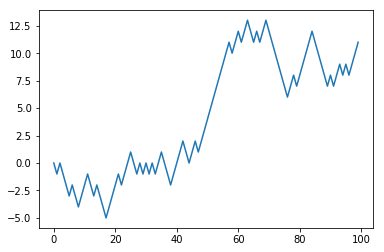

In [34]:
plt.plot(walk[:100])

不难看出，这其实就是随机漫步中各步的累计和，可以用一个数组运算来实现。因此，我用np.random模块一次性随机产生1000个“掷硬币”结果（即两个数中任选一个），将其分别设置为1或－1，然后计算累计和：

In [37]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print(walk.min())
walk.max()

-32


25

现在来看一个复杂点的统计任务——首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任一方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而我们想要知道的是第一个10或－10的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最大值的索引（True就是最大值）

In [38]:
(np.abs(walk) >= 10).argmax()

21

注意，这里使用argmax并不是很高效，因为它无论如何都会对数组进行完全扫描。在本例中，只要发现了一个True，那我们就知道它是个最大值了。
### 一次模拟多个随机漫步
如果你希望模拟多个随机漫步过程（比如5000个），只需对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程（一行一个）的累计和了：

In [39]:
nwalks = 5000 
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,   0,  -1, ..., -40, -39, -38],
       [  1,   0,   1, ..., -50, -51, -50],
       [  1,   0,  -1, ...,  18,  17,  18],
       ...,
       [  1,   2,   3, ...,  34,  35,  36],
       [ -1,   0,   1, ...,  18,  17,  16],
       [  1,   2,   3, ...,  88,  87,  88]], dtype=int32)

现在，我们来计算所有随机漫步过程的最大值和最小值

In [40]:
walks.max()

124

In [41]:
walks.min()

-128

得到这些数据之后，我们来计算30或－30的最小穿越时间。这里稍微复杂些，因为不是5000个过程都到达了30。我们可以用any方法来对此进行检查：

In [42]:
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
hits30.sum() # Number that hit 30 or -30

[ True  True False ...  True  True  True]


3395

然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [44]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.18085419734905

请尝试用其他分布方式得到漫步数据。只需使用不同的随机数生成函数即可，如normal用于生成指定均值和标准差的正态分布数据：

In [46]:
np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))

array([[-0.17081664, -0.11871256, -0.37546144, ...,  0.27105885,
        -0.27962195, -0.14014586],
       [-0.10996201, -0.26070997,  0.20881494, ...,  0.06600838,
         0.2947594 , -0.1748383 ],
       [ 0.27827998,  0.08778475, -0.02939505, ...,  0.01341573,
        -0.13879233,  0.02148726],
       ...,
       [-0.07548029, -0.28372494,  0.19150921, ..., -0.58622695,
        -0.10028284,  0.4615469 ],
       [-0.03204619,  0.05788295, -0.09322444, ...,  0.38160975,
         0.14445622,  0.07941027],
       [-0.01971829, -0.23895606,  0.25039202, ..., -0.39654543,
         0.36830892, -0.03489592]])